In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
FILE_PATH_OWID_COVID_CSV = "./raw/covid-19-data/public/data/owid-covid-data.csv"
FILE_PATH_WHO_DOCTORS = "./raw/who-datasets/Medical doctors (per 10,000).csv"

In [3]:
df = pd.read_csv(FILE_PATH_OWID_COVID_CSV)
df = df[(df.iso_code != 'OWID_WRL') & (df.total_cases.notnull())].sort_values('date', ascending=False).groupby('iso_code').first().reset_index()
df = df.loc[:, ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities']]

In [4]:
print(df.head())

  iso_code      continent     location        date  total_cases  total_deaths  \
0      ABW  North America        Aruba  2020-06-23        101.0           3.0   
1      AFG           Asia  Afghanistan  2020-06-23      29143.0         598.0   
2      AGO         Africa       Angola  2020-06-23        183.0           9.0   
3      AIA  North America     Anguilla  2020-06-23          3.0           0.0   
4      ALB         Europe      Albania  2020-06-23       1995.0          44.0   

   total_cases_per_million  aged_70_older  gdp_per_capita  extreme_poverty  \
0                  945.994          7.452       35973.781              NaN   
1                  748.632          1.337        1803.987              NaN   
2                    5.568          1.362        5819.495              NaN   
3                  199.973            NaN             NaN              NaN   
4                  693.238          8.643       11803.431              1.1   

   cvd_death_rate  diabetes_prevalence  fema

(209, 15)


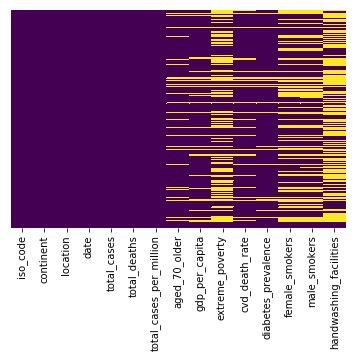

In [5]:
print(df.shape)
sns.heatmap(data = df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Deleting following countries because not enough data:
['Isle of Man' 'Turks and Caicos Islands' 'Anguilla' 'Falkland Islands'
 'Montserrat' 'Faeroe Islands' 'Guernsey' 'Gibraltar'
 'Bonaire Sint Eustatius and Saba' 'Jersey' 'Vatican' 'Western Sahara'
 'Sint Maarten (Dutch part)' 'British Virgin Islands' 'Liechtenstein'
 'Northern Mariana Islands' 'Kosovo' 'Greenland' 'French Polynesia'
 'Taiwan' 'New Caledonia' 'Monaco' 'Cayman Islands' 'Curacao' 'Guam'
 'Saint Kitts and Nevis' 'Aruba' 'San Marino'
 'United States Virgin Islands' 'Bermuda' 'South Sudan' 'Puerto Rico'
 'Dominica' 'Syria' 'Antigua and Barbuda' 'Grenada' 'Palestine'
 'Saint Vincent and the Grenadines' 'Venezuela' 'Somalia' 'Libya'
 'Andorra' 'Gabon' 'Macedonia' 'Angola' 'Central African Republic' 'Sudan'
 'Trinidad and Tobago' 'Guyana' 'Belize' 'Equatorial Guinea' 'Nicaragua'
 'Afghanistan' 'Saint Lucia' 'Jordan']
(154, 17)


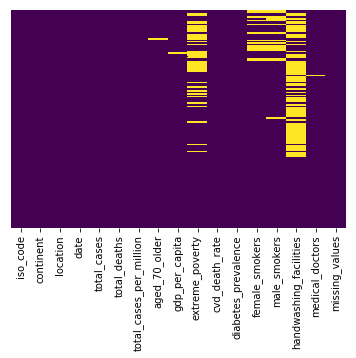

In [6]:
df_doctors = pd.read_csv(FILE_PATH_WHO_DOCTORS)
df_doctors.rename(columns={'Location':'location','Period':'year','First Tooltip':'medical_doctors'}, inplace=True)
df_doctors = df_doctors.loc[:, ['location','medical_doctors']]

def rename_countries_doctors(country):
    mapping = { 'Bolivia (Plurinational State of)':'Bolivia', 'Brunei Darussalam':'Brunei',
               'Cabo Verde':'Cape Verde', 'Eswatini':'Swaziland',
               'Côte d’Ivoire':'Cote d\'Ivoire', 'Czechia':'Czech Republic',
               'Democratic Republic of the Congo':'Democratic Republic of Congo',
               'Iran (Islamic Republic of)':'Iran',
               'Lao People\'s Democratic Republic':'Laos',
               'The former Yugoslav Republic of Macedonia':'Macedonia',
               'Republic of Moldova':'Moldova', 'Russian Federation':'Russia',
               'Republic of Korea':'South Korea', 'Syrian Arab Republic':'Syria',
               'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
               'United States of America':'United States',
               'United Republic of Tanzania':'Tanzania', 'Viet Nam':'Vietnam',
               'Venezuela (Bolivarian Republic of)':'Venezuela',
              }
    if (country in mapping):
        return mapping[country]
    return country

df_doctors['location'] = df_doctors['location'].apply(lambda x: rename_countries_doctors(x))

df_merged = df.merge(df_doctors, how = 'left', on = ['location'])

#print("countries where no data about medical doctors is present:",
#      df_merged[df_merged.loc[:, ['medical_doctors']].isnull().any(axis=1)].loc[:, 'location'].values)
#df_merged = df_merged[df_merged['medical_doctors'].notna()]

missing_values = []
for i in range(len(df_merged.index)):
    missing_values.append(df_merged.iloc[i].isnull().sum())
df_merged['missing_values'] = missing_values
df_merged = df_merged.sort_values('missing_values', ascending=False)

print('Deleting following countries because not enough data:')
treshold = 3
print(df_merged[df_merged.missing_values>=treshold].loc[:, 'location'].values)
df_merged = df_merged[df_merged.missing_values<treshold]

print(df_merged.shape)
sns.heatmap(data = df_merged.isnull(), yticklabels=False, cbar=False, cmap='viridis')